#Использование нейронной сети для распознавания моделей одежды в Keras


Keras — открытая нейросетевая библиотека, написанная на языке Python. Она представляет собой надстройку над фреймворками TensorFlow + Theano и нацелена на оперативную работу с сетями глубокого обучения.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Просматриваем примеры изображений

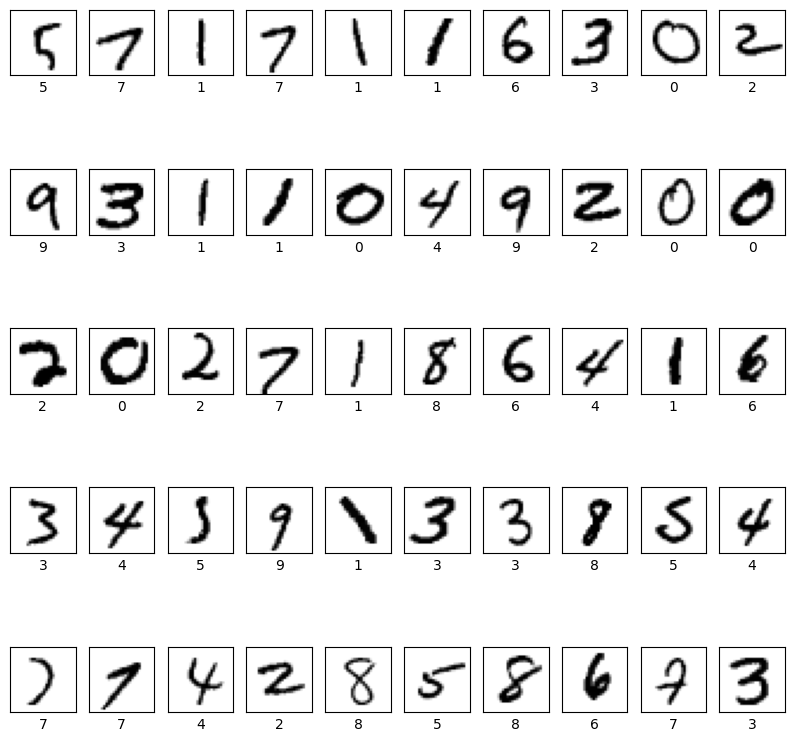

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

**Преобразование размерности данных в наборе**

In [ ]:
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

**Нормализация данных**

In [ ]:
x_train = x_train / 255 
x_test = x_test / 255 

**Преобразуем метки в формат one hot encoding**

In [ ]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

## Создаем нейронную сеть

**Создаем последовательную модель**

In [ ]:
model = Sequential()
model.add(Dense(4096, input_dim=784, activation="relu"))
model.add(Dense(2048, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [ ]:
model.compile(loss="categorical_crossentropy", 
              optimizer="SGD", 
              metrics=["accuracy"]) 

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              3215360   
                                                                 
 dense_1 (Dense)             (None, 2048)              8390656   
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 10)                1

## Обучаем нейронную сеть

In [ ]:
history = model.fit(x_train, y_train, 
                    batch_size=20, 
                    epochs=50,
                    validation_split=0.2)

Epoch 1/50
2400/2400 [==============================] - 19s 6ms/step - loss: 0.4707 - accuracy: 0.8701 - val_loss: 0.1818 - val_accuracy: 0.9462
Epoch 2/50
2400/2400 [==============================] - 15s 6ms/step - loss: 0.1532 - accuracy: 0.9544 - val_loss: 0.1403 - val_accuracy: 0.9566
Epoch 3/50
2400/2400 [==============================] - 13s 6ms/step - loss: 0.0981 - accuracy: 0.9707 - val_loss: 0.1277 - val_accuracy: 0.9621
Epoch 4/50
2400/2400 [==============================] - 14s 6ms/step - loss: 0.0670 - accuracy: 0.9798 - val_loss: 0.1111 - val_accuracy: 0.9667
Epoch 5/50
2400/2400 [==============================] - 14s 6ms/step - loss: 0.0476 - accuracy: 0.9856 - val_loss: 0.0914 - val_accuracy: 0.9738
Epoch 6/50
2400/2400 [==============================] - 13s 6ms/step - loss: 0.0315 - accuracy: 0.9910 - val_loss: 0.0820 - val_accuracy: 0.9760
Epoch 7/50
2400/2400 [==============================] - 13s 6ms/step - loss: 0.0206 - accuracy: 0.9943 - val_loss: 0.0873 - val_ac

## Сохраняем нейронную сеть для последующего использования

In [10]:
model.save('mnist_dense.h5')

## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [11]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0884 - accuracy: 0.9809


Доля верных ответов на тестовых данных, в процентах: 98.09


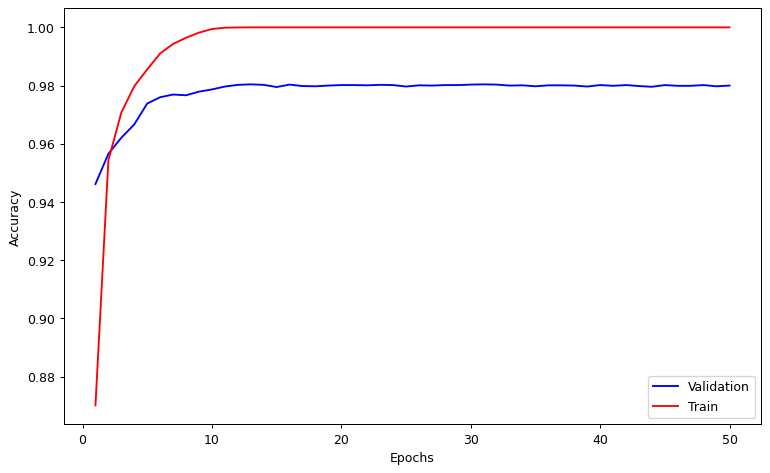

In [12]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.figure(figsize=(10,6), dpi=90)
plt.plot(epochs, val_acc_values, 'b', label='Validation')
plt.plot(epochs, acc_values, 'r', label='Train')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Используем сеть для распознавания рукописной цифры

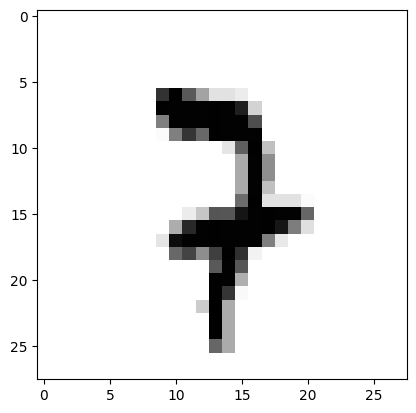

In [13]:
n_rec = 114
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Меняем размерность изображения и нормализуем его**

In [14]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [15]:
prediction = model.predict(x)

1/1 [==============================] - 0s 103ms/step


**Печатаем результаты распознавания**

In [16]:
prediction

array([[3.2257610e-12, 3.9225630e-11, 2.6466472e-07, 1.5724407e-06,
        1.3180328e-15, 1.5980832e-16, 1.1317190e-18, 9.9999821e-01,
        1.5143659e-12, 2.9496130e-09]], dtype=float32)

**Преобразуем результаты из формата one hot encoding**

In [17]:
prediction = np.argmax(prediction[0])
print("Результат:", prediction)
print("Ответ:", np.argmax(y_test[n_rec]))


Результат: 7
Ответ: 7


## Загружаем свою картинку

In [18]:
files.upload()

Saving 0.jpg to 0.jpg
Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg


{'0.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe1\x00"Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x01\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x02\x01\x01\x02\x02\x02\x02\x02\x02\x02\x02\x03\x05\x03\x03\x03\x03\x03\x06\x04\x04\x03\x05\x07\x06\x07\x07\x07\x06\x07\x07\x08\t\x0b\t\x08\x08\n\x08\x07\x07\n\r\n\n\x0b\x0c\x0c\x0c\x0c\x07\t\x0e\x0f\r\x0c\x0e\x0b\x0c\x0c\x0c\xff\xdb\x00C\x01\x02\x02\x02\x03\x03\x03\x06\x03\x03\x06\x0c\x08\x07\x08\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\xff\xc0\x00\x11\x08\x00\xa4\x00\xb6\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\

Проверяем загрузку картинки

In [19]:
!ls
!rm ''

0.jpg  2.jpg  4.jpg  6.jpg  8.jpg  mnist_dense.h5
1.jpg  3.jpg  5.jpg  7.jpg  9.jpg  sample_data
rm: cannot remove '': No such file or directory


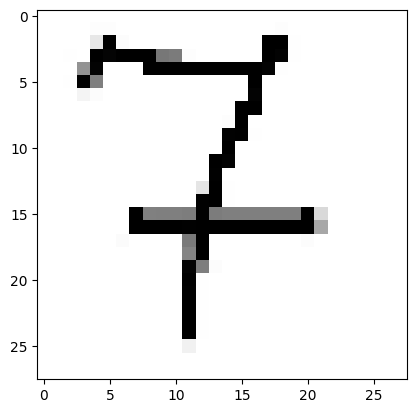

1/1 [==============================] - 0s 18ms/step
[[7.7958731e-08 2.8383874e-07 9.9923182e-01 4.6260178e-04 1.6592326e-08
  2.4219751e-10 2.5245204e-04 5.8129207e-10 5.2744366e-05 7.6081528e-12]]
Результат: 2


In [20]:

img_path = '7.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

plt.imshow(img.convert('RGBA'))
plt.show()

# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

prediction = model.predict(x)
print(prediction)

prediction = np.argmax(prediction)
print("Результат:", prediction)

Загружаем картинку из файла

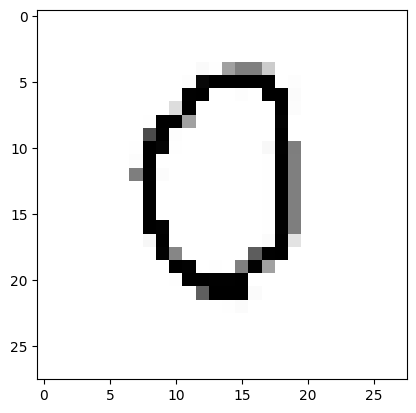

1/1 [==============================] - 0s 17ms/step
[[8.7307638e-01 3.7121595e-07 1.2842854e-04 1.6561494e-09 4.3749292e-06
  1.7741495e-07 1.6519600e-05 1.2666526e-01 2.6421769e-05 8.2034116e-05]]
Результат: 0


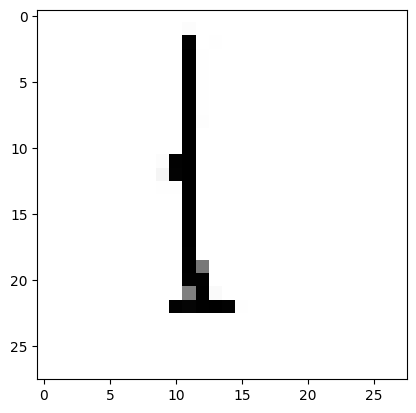

1/1 [==============================] - 0s 20ms/step
[[1.1934229e-02 2.0117461e-06 5.5884746e-05 1.7707960e-08 1.8631970e-05
  1.3837941e-02 9.6377945e-01 2.9393692e-07 1.0370017e-02 1.4854468e-06]]
Результат: 6


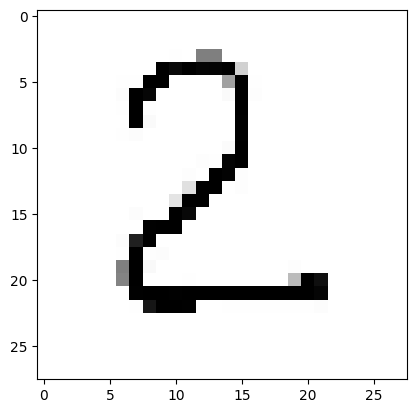

1/1 [==============================] - 0s 18ms/step
[[3.6205428e-08 4.2617703e-05 9.9985242e-01 9.7371694e-06 9.4683454e-12
  2.2136357e-09 4.1094222e-06 7.6031882e-11 9.1099944e-05 2.8535253e-14]]
Результат: 2


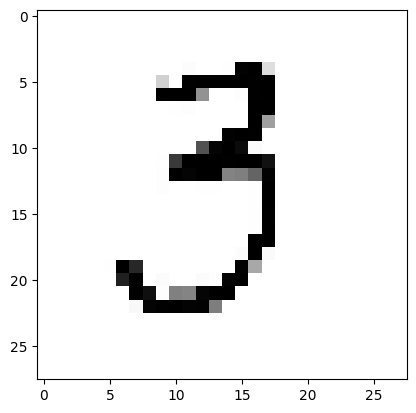

1/1 [==============================] - 0s 21ms/step
[[4.9797904e-14 8.1966900e-10 3.5855806e-12 9.9970490e-01 8.1017658e-14
  1.1604965e-06 4.3049106e-17 1.9686056e-10 1.7049263e-08 2.9385425e-04]]
Результат: 3


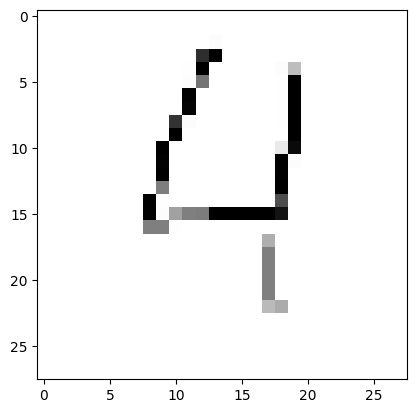

1/1 [==============================] - 0s 17ms/step
[[2.0331690e-06 1.8201309e-03 4.7692092e-04 8.8742681e-06 9.9535322e-01
  1.3132904e-05 1.8772134e-04 7.2653650e-04 9.2673424e-04 4.8461295e-04]]
Результат: 4


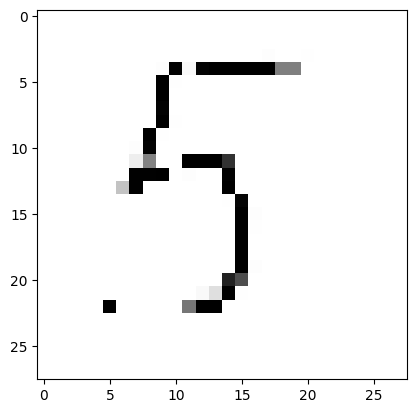

1/1 [==============================] - 0s 21ms/step
[[1.8284486e-06 1.0932003e-02 5.4491509e-05 1.6516794e-02 3.8753598e-05
  8.4606510e-01 3.2554401e-04 7.0263544e-04 1.2379469e-01 1.5681961e-03]]
Результат: 5


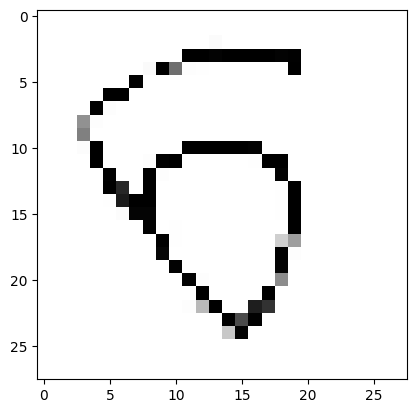

1/1 [==============================] - 0s 18ms/step
[[2.3226053e-01 7.2411750e-04 4.0773386e-05 5.8876394e-05 1.3318775e-03
  1.9492453e-01 1.8523738e-01 3.8491789e-01 4.8890075e-04 1.5126998e-05]]
Результат: 7


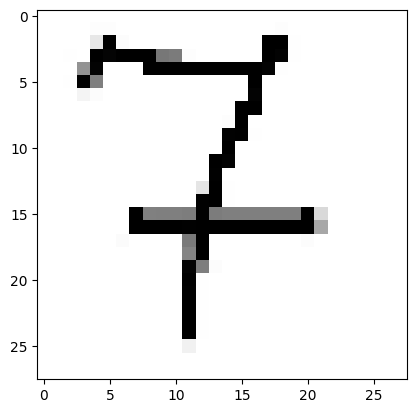

1/1 [==============================] - 0s 17ms/step
[[7.7958731e-08 2.8383874e-07 9.9923182e-01 4.6260178e-04 1.6592326e-08
  2.4219751e-10 2.5245204e-04 5.8129207e-10 5.2744366e-05 7.6081528e-12]]
Результат: 2


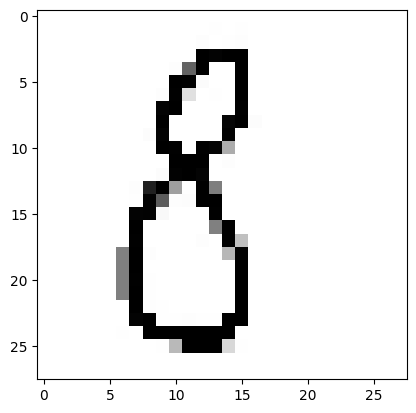

1/1 [==============================] - 0s 18ms/step
[[1.7267038e-08 7.6989869e-07 1.1636165e-07 2.5459269e-05 1.2876903e-09
  9.9661392e-01 4.0095048e-07 3.3659972e-10 3.3593981e-03 2.3616360e-09]]
Результат: 5


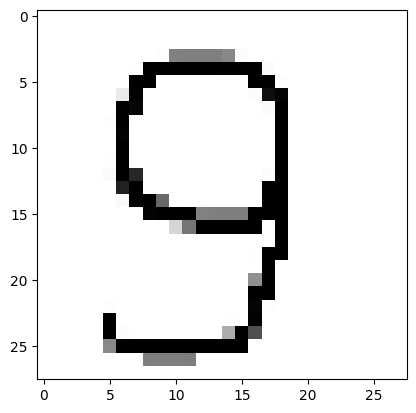

1/1 [==============================] - 0s 20ms/step
[[4.3750348e-10 3.1898142e-09 9.7014054e-06 9.9436802e-01 7.9902783e-08
  1.2890368e-06 4.9653137e-10 7.8999574e-07 4.9795676e-04 5.1222206e-03]]
Результат: 3


In [21]:
for digit in range(10):
  img_path = str(digit) + '.jpg'
  img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

  plt.imshow(img.convert('RGBA'))
  plt.show()

  # Преобразуем картинку в массив
  x = image.img_to_array(img)
  # Меняем форму массива в плоский вектор
  x = x.reshape(1, 784)
  # Инвертируем изображение
  x = 255 - x
  # Нормализуем изображение
  x /= 255

  prediction = model.predict(x)
  print(prediction)

  prediction = np.argmax(prediction)
  print("Результат:", prediction)